# 과제7

코드 튜토리얼에 사용된 모델들은 분류 뿐만 아니라 회귀도 가능하다. 다음과 같이 회귀를 사용해보자.

4주차 튜토리얼에 사용된 California Housing data를 다시 사용해보자

- **MedInc**: Median income in block group.
- **HouseAge**: Median age of the houses in block group.
- **AveRooms**: Average number of rooms per household.
- **AveBedrms**: Average number of bedrooms per household.
- **Population**: Block group population.
- **AveOccup**: Average number of household members.
- **Latitude**: Latitude of the block group centroid.
- **Longitude**: Longitude of the block group centroid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()

In [2]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [3]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Q1 `housing_df`를 train, test split을 해봅시다.

분할 비율을 자유롭게 설정해봅시다.

In [4]:
train, test = train_test_split(housing_df, test_size=0.2, random_state=42)

# Q2  데이터를 `RandomForestRegressor`에 적합해 봅시다.
train set 에 대해 `MedHouseVal`을 종속변수, 나머지를 독립변수로 하는 random forest regressor를 적합해 봅시다.

test set으로 prediction을 한 후 MSE를 구해 봅시다.


In [9]:
from sklearn.ensemble import RandomForestRegressor
train_X = train.drop('MedHouseVal', axis=1)
train_y = train['MedHouseVal']
test_X = test.drop('MedHouseVal', axis=1)
test_y = test['MedHouseVal']

In [10]:
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(train_X, train_y)

# Make predictions using the fitted model
rf_pred = rf_model.predict(test_X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, rf_pred)
print(mse)

0.2535856889316406


# Q3 데이터를 `AdaBoostRegressor`에 적합해봅시다.

위와 동일

In [11]:
from sklearn.ensemble import AdaBoostRegressor

ab_model = AdaBoostRegressor()

# Fit the model to the training data
ab_model.fit(train_X, train_y)

# Make predictions using the fitted model
ab_pred = ab_model.predict(test_X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, ab_pred)
print(mse)

0.7747391709690773


# Q4 데이터를 `GradientBoostingRegressor`에 적합해 봅시다.

위와 동일

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

Gb_model = AdaBoostRegressor()

# Fit the model to the training data
Gb_model.fit(train_X, train_y)

# Make predictions using the fitted model
Gb_pred = Gb_model.predict(test_X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, Gb_pred)
print(mse)

0.6833875867479703


# Q5 데이터를 `lightgbm` 회귀에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다.

Documentation

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

예시

https://www.geeksforgeeks.org/regression-using-lightgbm/


In [15]:
import lightgbm as lgb

train_data = lgb.Dataset(train_X, label=train_y)

params = {
    'objective': 'regression',
    'metric': 'rmse',  # 평균 제곱근 오차
    'boosting_type': 'gbdt',  # 그래디언트 부스팅 결정 트리
    'num_leaves': 31,  # 트리의 최대 잎 수
    'learning_rate': 0.05,  # 학습률
    'feature_fraction': 0.8,  # 각 트리에 사용할 특징의 비율
    'bagging_fraction': 0.8,  # 각 트리에 사용할 데이터의 비율
    'bagging_freq': 5,  # 배깅 빈도
    'verbose': 0  # 출력을 억제합니다.
}

num_round = 100
bst = lgb.train(params, train_data, num_round)

lgb_pred = bst.predict(test_X)

mse = mean_squared_error(test_y, lgb_pred)
print('평균 제곱근 오차:', mse)

평균 제곱근 오차: 0.22954827579802967


# Q6 데이터를 `xgboost`에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다

In [16]:
import xgboost as xgb

train_data = xgb.DMatrix(train_X, label=train_y)
test_data = xgb.DMatrix(test_X, label=test_y)

params = {
    'objective': 'reg:squarederror',  # 제곱 오차 손실 함수
    'eval_metric': 'rmse',  # 평균 제곱근 오차
    'eta': 0.1,  # 학습률
    'max_depth': 6,  # 트리의 최대 깊이
    'subsample': 0.8,  # 각 트리에 사용할 데이터의 비율
    'colsample_bytree': 0.8  # 각 트리에 사용할 특징의 비율
}

num_round = 100
bst = xgb.train(params, train_data, num_round)

xgb_pred = bst.predict(test_data)

mse = mean_squared_error(test_y, xgb_pred)
print('평균 제곱근 오차:', mse)

평균 제곱근 오차: 0.21761786146205112


# Q7 `RandomForestRegressor`의 feature importance를 시각화해봅시다.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

위를 참고해보면서 Q2에서 적합한 random forest regressor의 feature importance를 시각화해 봅시다.

중요한 feature 부터 내림차순으로 시각화해 봅시다.

In [18]:
importances = rf_model.feature_importances_
importances

array([0.52561698, 0.05529183, 0.04543453, 0.02966786, 0.03087714,
       0.13719185, 0.08795774, 0.08796207])

In [20]:
indices = np.argsort(importances)[::-1]
indices

array([0, 5, 7, 6, 1, 2, 4, 3])

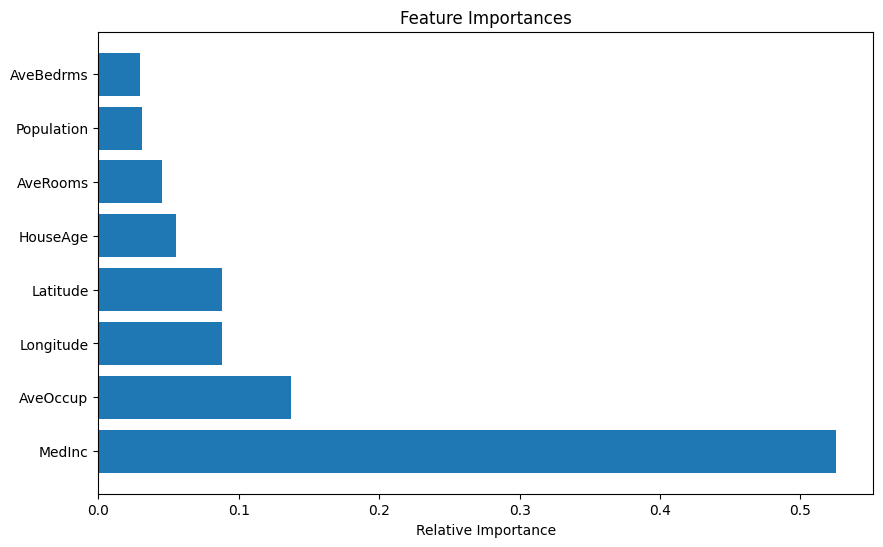

In [21]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(train_X.shape[1]), importances[indices], align="center")
plt.yticks(range(train_X.shape[1]), train_X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()